# Proyek Analisis Prediktif: Prediksi Kualitas Wine

# 1. Pemahaman Bisnis
Penilaian kualitas wine secara tradisional dilakukan oleh ahli melalui tes sensorik, yang memakan waktu dan subjektif.
Memprediksi kualitas wine berdasarkan sifat fisikokimia dapat membantu kilang anggur:
- Meningkatkan proses kontrol kualitas
- Mengoptimalkan parameter produksi
- Mengurangi biaya yang terkait dengan pengecapan oleh ahli
- Memberikan penilaian kualitas yang lebih objektif

# 2. Data Understanding

Kita akan menggunakan dataset Wine Quality yang tersedia secara publik. Dataset ini berisi informasi tentang atribut fisikokimia dari wine beserta penilaian kualitasnya.

### 2.1 Import Library

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Mengatur tampilan plot
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

### 2.2 Load Dataset

In [2]:
# Memuat dataset
df = pd.read_csv('WineQT.csv')

# Menampilkan beberapa baris pertama
print("Dimensi dataset:", df.shape)
df.head()

Dimensi dataset: (1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
# Informasi dataset
print("\nInformasi Dataset:")
print(df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [4]:
# Statistik deskriptif
print("\nRingkasan Statistik:")
print(df.describe())


Ringkasan Statistik:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000        

In [5]:
# Memeriksa missing values
print("Jumlah missing values per kolom:")
df.isnull().sum()

Jumlah missing values per kolom:


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


### 2.3 Eksplorasi Data

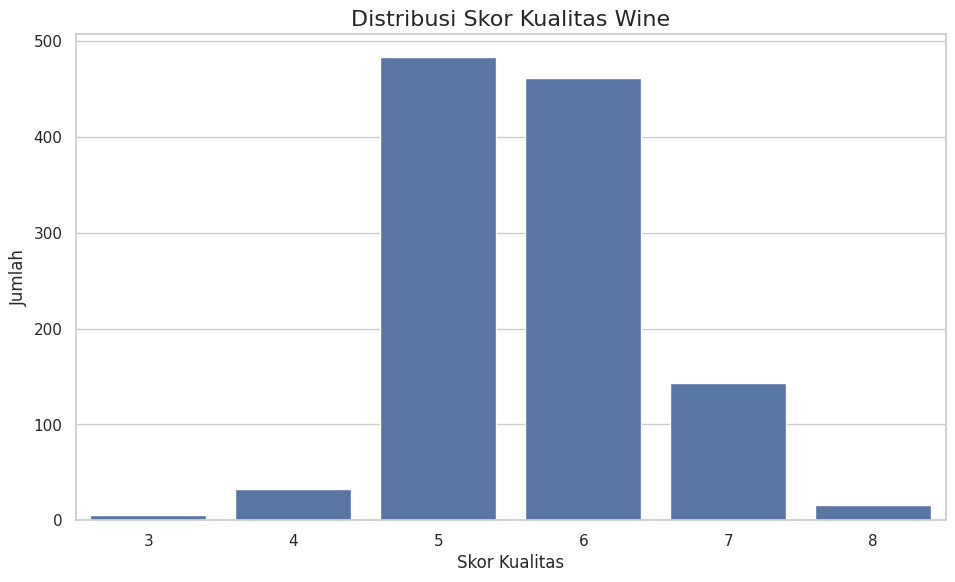

In [6]:
# Distribusi kualitas wine
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribusi Skor Kualitas Wine', fontsize=16)
plt.xlabel('Skor Kualitas', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.savefig('images/quality_distribution.png', bbox_inches='tight')
plt.show()

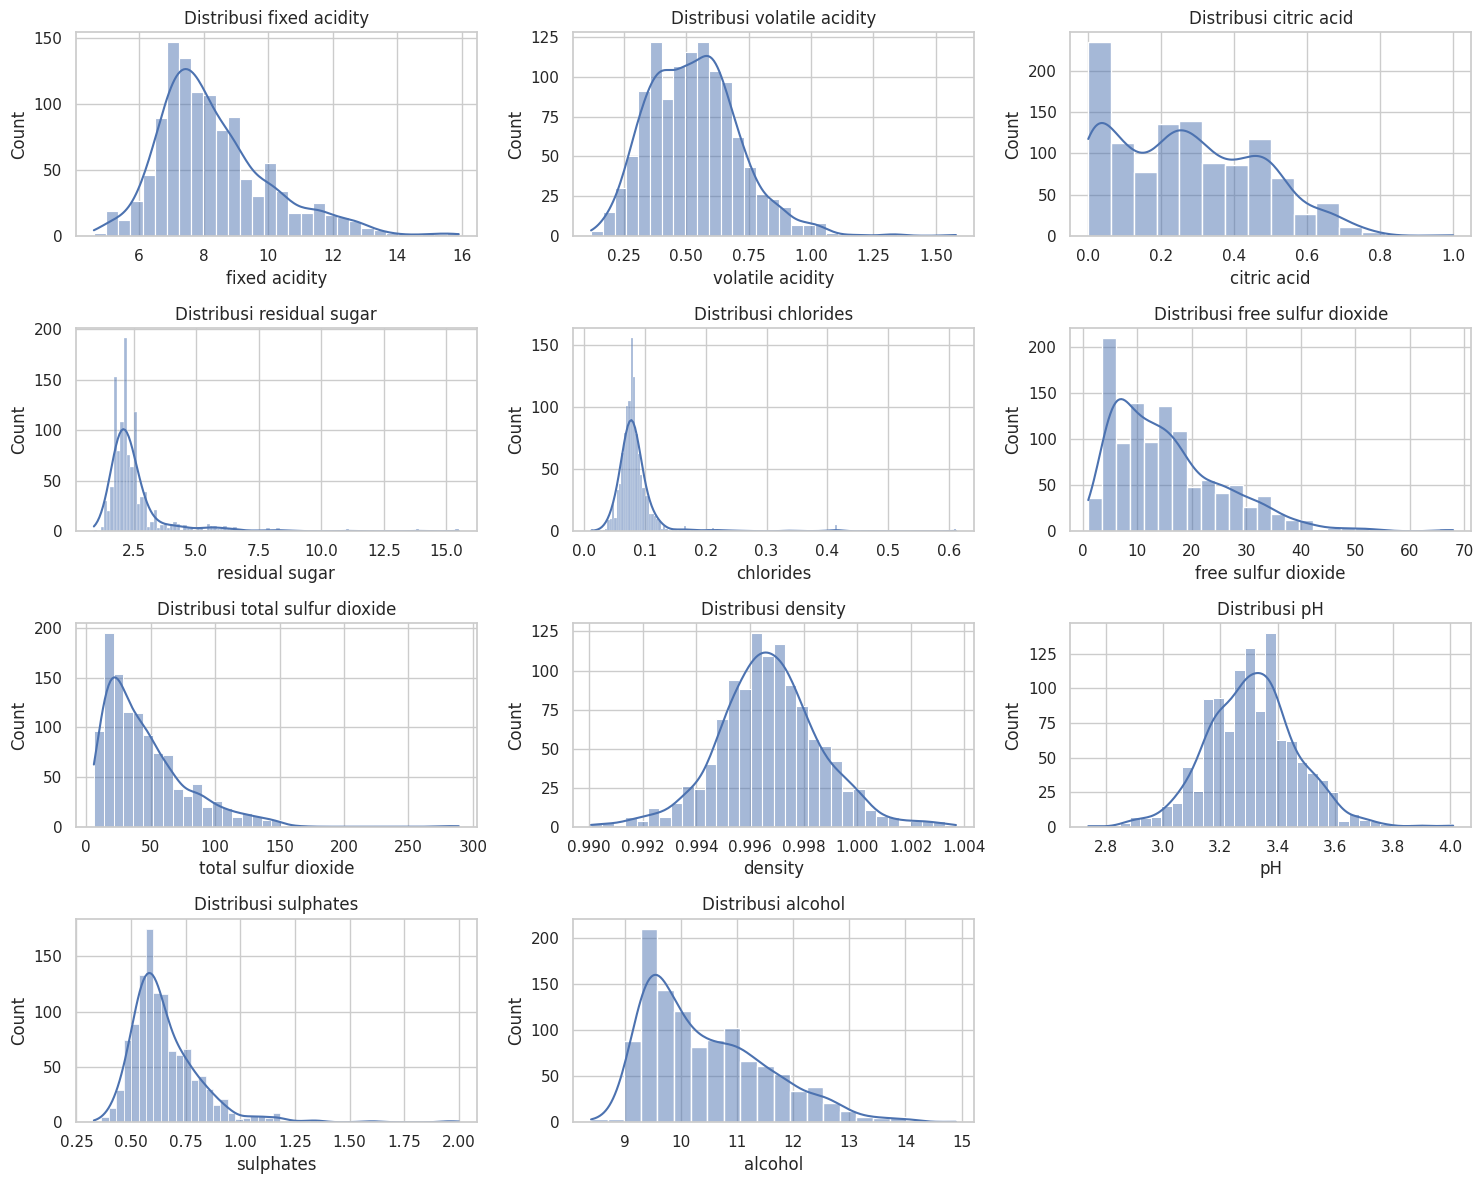

In [7]:
# Menganalisis distribusi fitur
plt.figure(figsize=(15, 12))
for i, col in enumerate(df.columns[:-2]):  # Mengecualikan 'quality' dan 'Id'
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.savefig('images/feature_distributions.png')
plt.show()

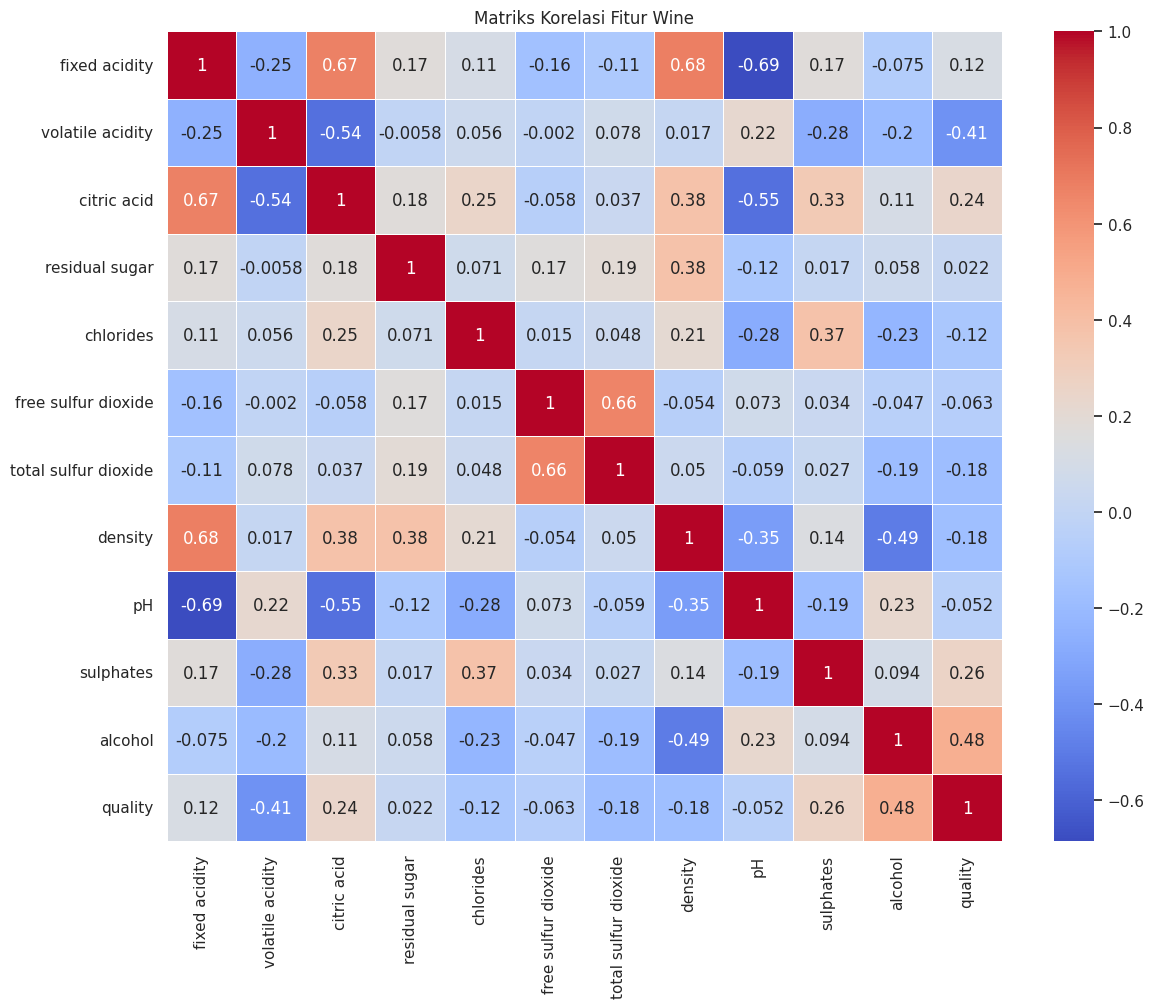

In [8]:
# Analisis korelasi
plt.figure(figsize=(12, 10))
correlation_matrix = df.drop('Id', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Fitur Wine')
plt.savefig('images/correlation_matrix.png')
plt.show()

In [9]:
# Korelasi dengan variabel target
quality_correlation = correlation_matrix['quality'].sort_values(ascending=False)
print("\nKorelasi Fitur dengan Kualitas:")
print(quality_correlation)


Korelasi Fitur dengan Kualitas:
quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


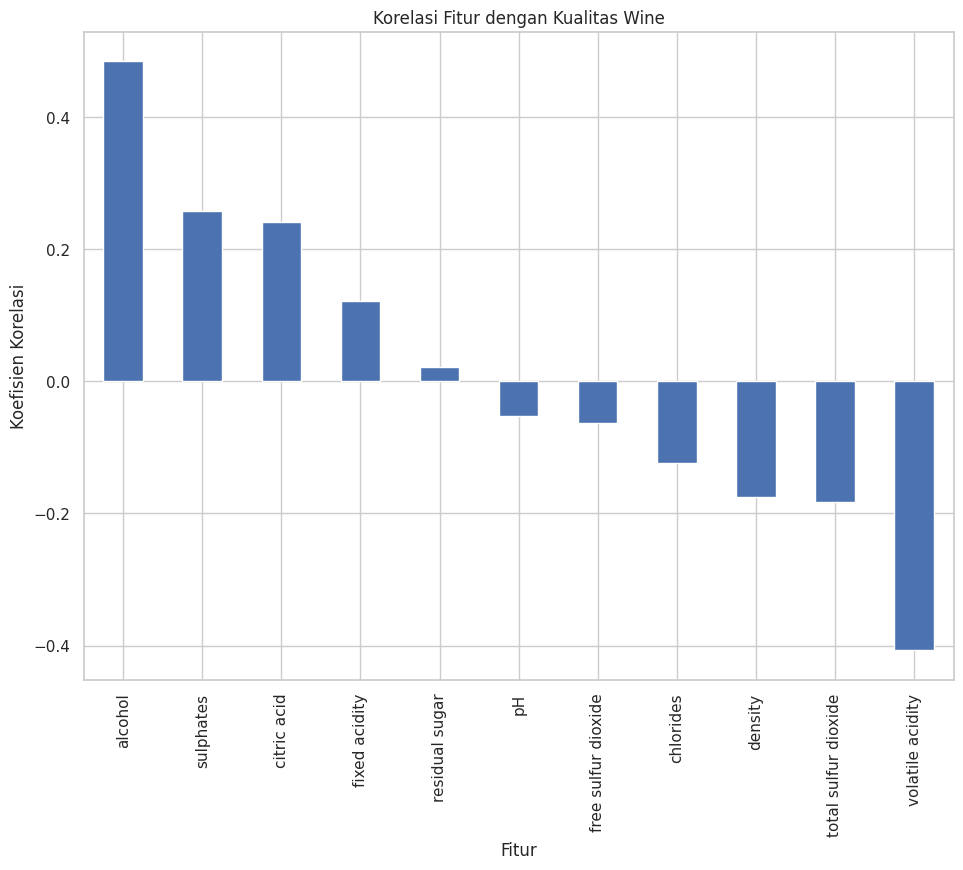

In [10]:
# Plot korelasi dengan target
plt.figure(figsize=(10, 8))
quality_correlation.drop('quality').plot(kind='bar')
plt.title('Korelasi Fitur dengan Kualitas Wine')
plt.xlabel('Fitur')
plt.ylabel('Koefisien Korelasi')
plt.savefig('images/quality_correlation.png')
plt.show()

<Figure size 1200x1000 with 0 Axes>

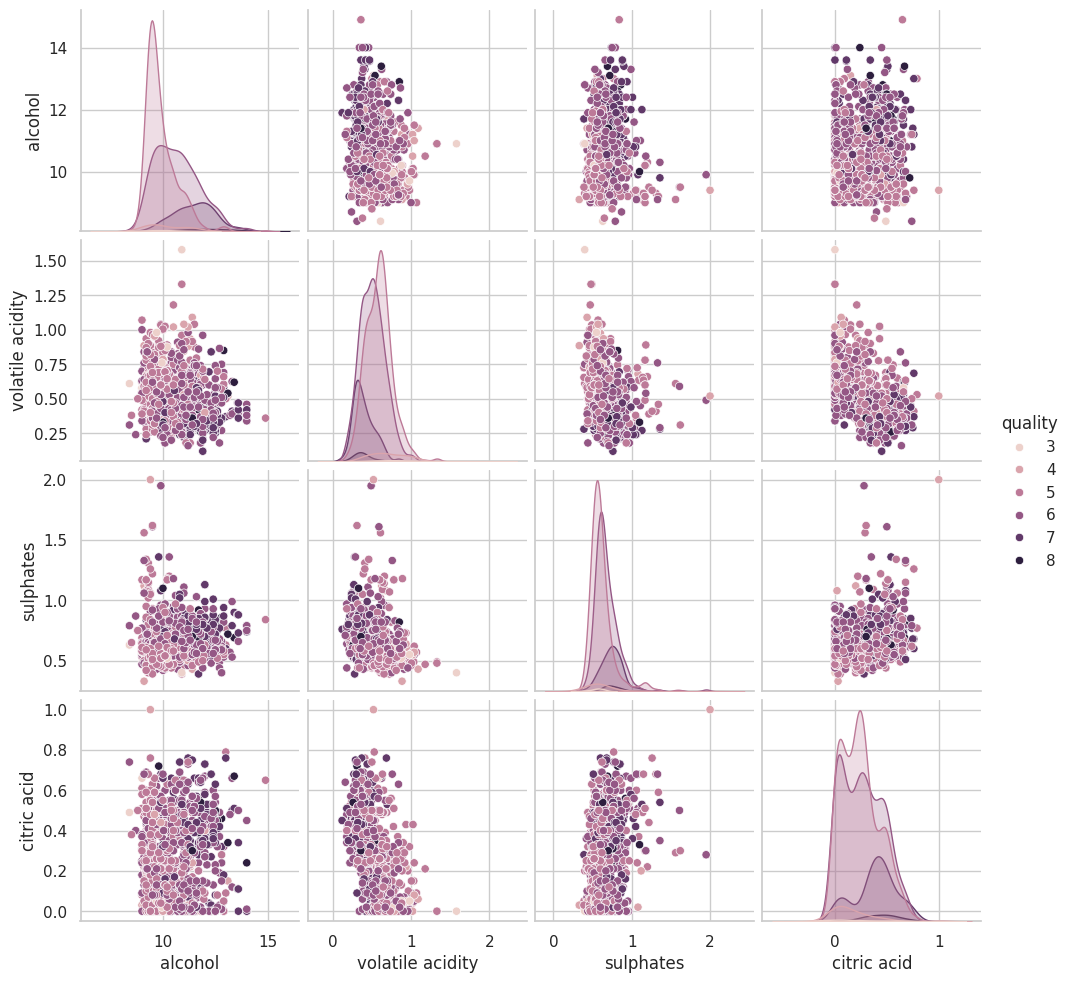

In [11]:
# Pairplot untuk fitur dengan korelasi tertinggi
top_features = quality_correlation.drop('quality').abs().sort_values(ascending=False).index[:4]
plt.figure(figsize=(12, 10))
sns.pairplot(df[list(top_features) + ['quality']], hue='quality')
plt.savefig('images/pairplot_top_features.png')
plt.show()

## 3. Data Preparation

In [12]:
# Menghapus kolom Id karena bukan fitur prediktif
df = df.drop('Id', axis=1)

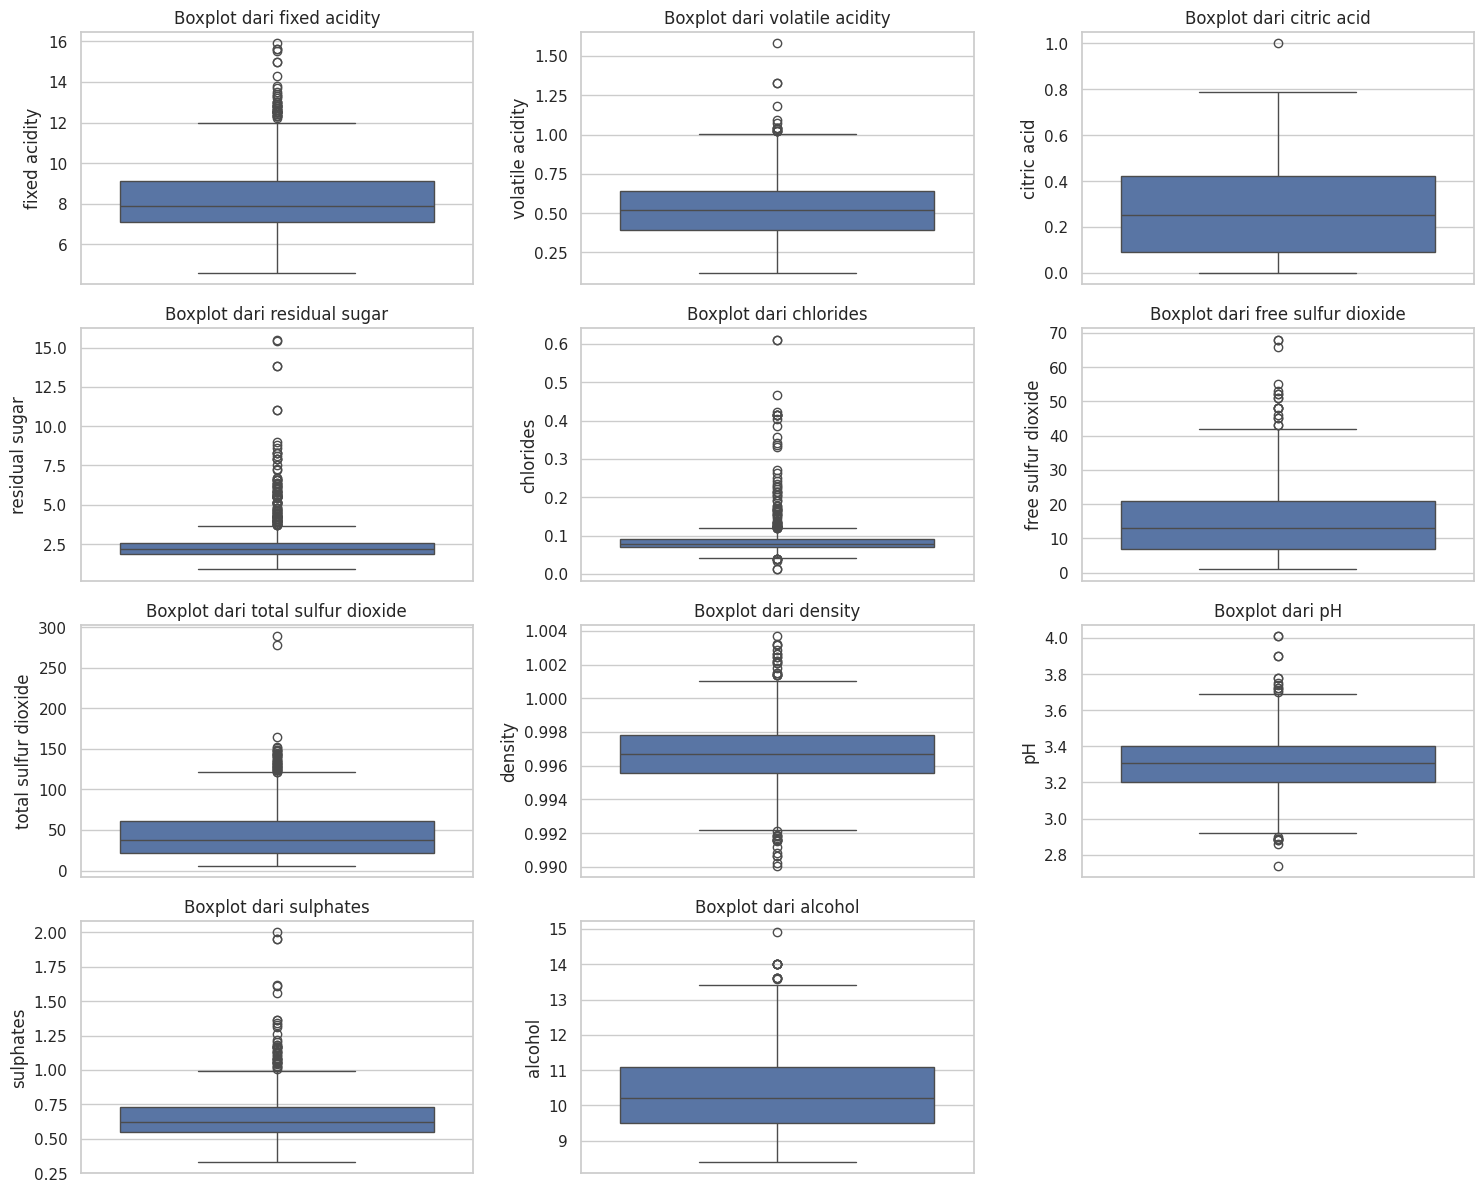

In [13]:
# Memeriksa outlier
plt.figure(figsize=(15, 12))
for i, col in enumerate(df.columns[:-1]):  # Mengecualikan 'quality'
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot dari {col}')
plt.tight_layout()
plt.savefig('images/boxplots.png')
plt.show()

In [14]:
# Menangani outlier menggunakan metode IQR untuk nilai ekstrem
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df

for column in df.columns[:-1]:  # Mengecualikan 'quality'
    df = handle_outliers(df, column)

In [15]:
# Pemisahan fitur dan target
X = df.drop('quality', axis=1)
y = df['quality']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menstandarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nBentuk set pelatihan:", X_train.shape)
print("Bentuk set pengujian:", X_test.shape)


Bentuk set pelatihan: (914, 11)
Bentuk set pengujian: (229, 11)


## 4. Modeling

In [16]:
# Menginisialisasi model
models = {
    'Regresi Linier': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [17]:
# Melatih model dan mengevaluasi dengan validasi silang
print("\nHasil Validasi Silang:")
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    print(f"{name} - Rata-rata RMSE: {rmse_scores.mean():.4f}, Std: {rmse_scores.std():.4f}")

    # Melatih model pada set pelatihan penuh
    model.fit(X_train_scaled, y_train)
    models[name] = model


Hasil Validasi Silang:
Regresi Linier - Rata-rata RMSE: 0.6514, Std: 0.0278
Random Forest - Rata-rata RMSE: 0.6186, Std: 0.0228
Gradient Boosting - Rata-rata RMSE: 0.6478, Std: 0.0261


In [18]:
# Penyetelan hiperparameter untuk model terbaik
# Berdasarkan hasil awal, mari kita setel Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

rf_grid.fit(X_train_scaled, y_train)
print("\nParameter Random Forest Terbaik:", rf_grid.best_params_)
print("RMSE Random Forest Terbaik:", np.sqrt(-rf_grid.best_score_))

# Menambahkan model yang disetel ke kamus model
models['Random Forest yang Disetel'] = rf_grid.best_estimator_


Parameter Random Forest Terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
RMSE Random Forest Terbaik: 0.6176301319210519


## 5. Evaluation

In [19]:
print("\nEvaluasi Model pada Set Pengujian:")
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)

    # Menghitung metrik
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nPerforma {name}:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")


Evaluasi Model pada Set Pengujian:

Performa Regresi Linier:
MSE: 0.3510
RMSE: 0.5924
MAE: 0.4617
R²: 0.3693

Performa Random Forest:
MSE: 0.2979
RMSE: 0.5458
MAE: 0.4107
R²: 0.4647

Performa Gradient Boosting:
MSE: 0.3375
RMSE: 0.5809
MAE: 0.4493
R²: 0.3935

Performa Random Forest yang Disetel:
MSE: 0.3028
RMSE: 0.5502
MAE: 0.4145
R²: 0.4559


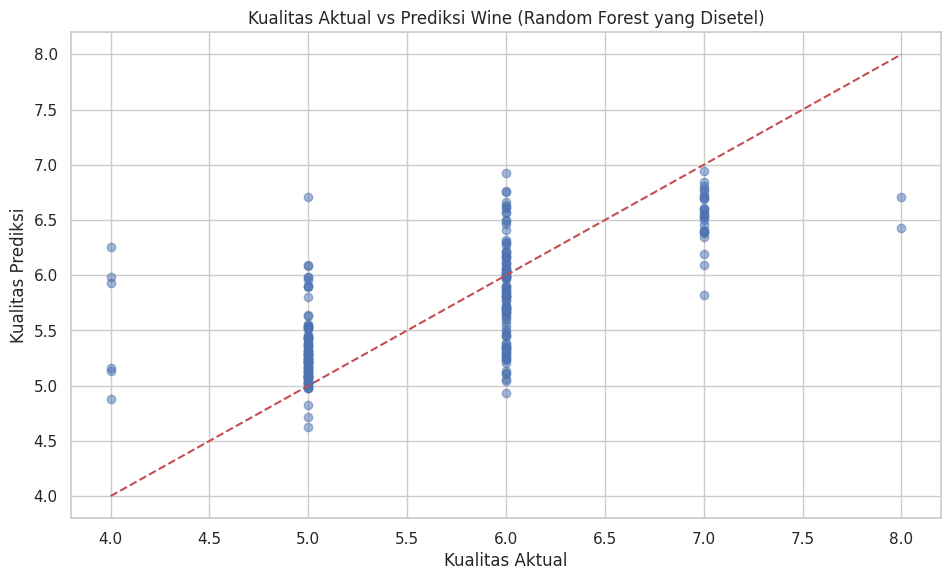

In [20]:
# Memvisualisasikan nilai aktual vs prediksi untuk model terbaik
best_model = models['Random Forest yang Disetel']
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Kualitas Aktual')
plt.ylabel('Kualitas Prediksi')
plt.title('Kualitas Aktual vs Prediksi Wine (Random Forest yang Disetel)')
plt.savefig('images/actual_vs_predicted.png')
plt.show()

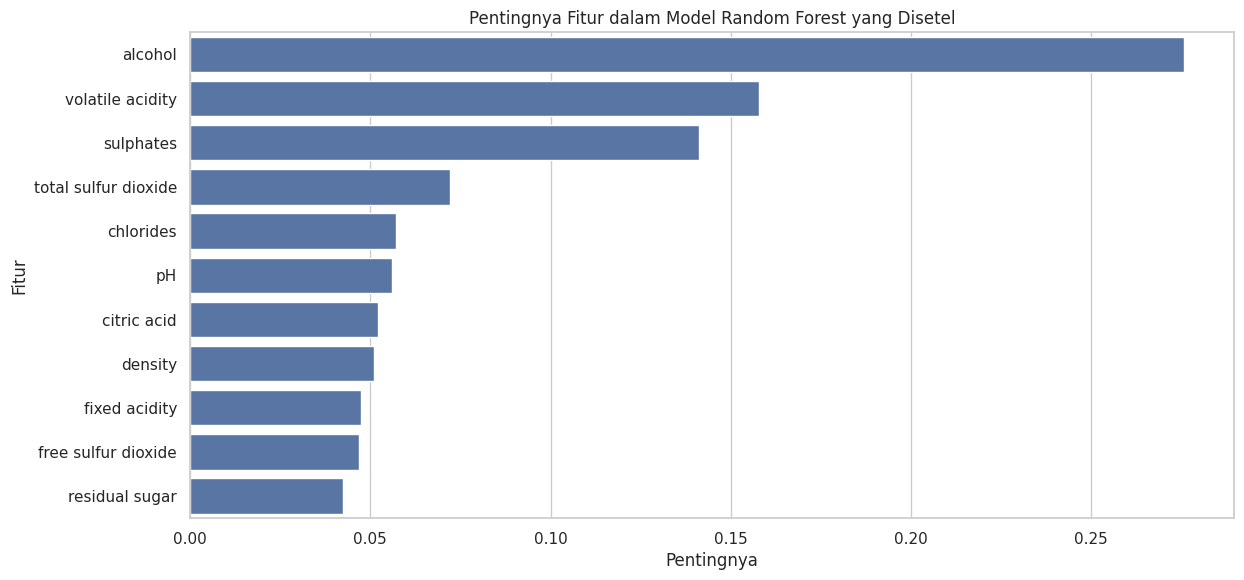


Pentingnya Fitur:
                   Fitur  Pentingnya
10               alcohol    0.275848
1       volatile acidity    0.157932
9              sulphates    0.141253
6   total sulfur dioxide    0.072160
4              chlorides    0.057049
8                     pH    0.056129
2            citric acid    0.052148
7                density    0.050944
0          fixed acidity    0.047413
5    free sulfur dioxide    0.046819
3         residual sugar    0.042306


In [21]:
# Pentingnya fitur untuk model terbaik
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Fitur': X.columns,
        'Pentingnya': best_model.feature_importances_
    }).sort_values(by='Pentingnya', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Pentingnya', y='Fitur', data=feature_importance)
    plt.title('Pentingnya Fitur dalam Model Random Forest yang Disetel')
    plt.savefig('images/feature_importance.png')
    plt.show()

    print("\nPentingnya Fitur:")
    print(feature_importance)

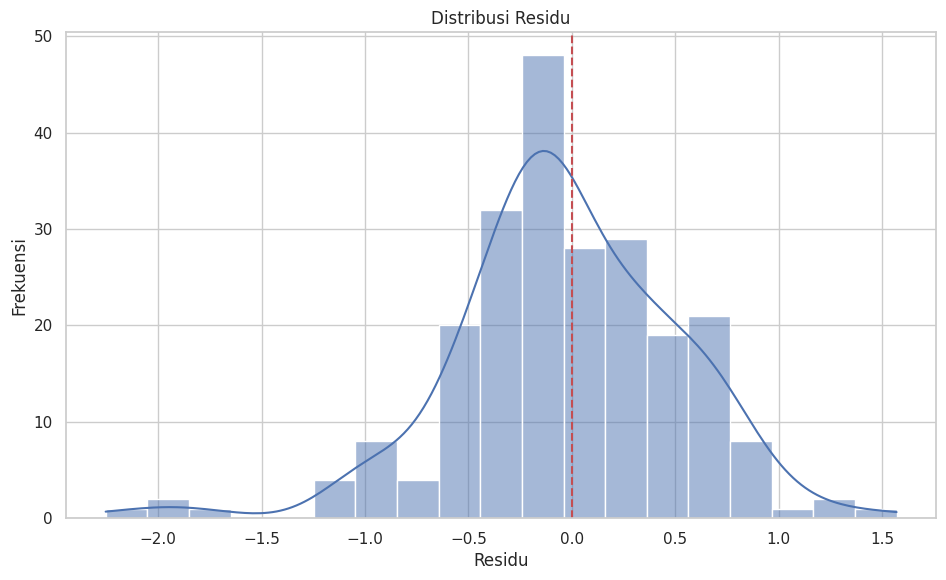

In [22]:
# Analisis residu
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residu')
plt.ylabel('Frekuensi')
plt.title('Distribusi Residu')
plt.savefig('images/residual_distribution.png')
plt.show()

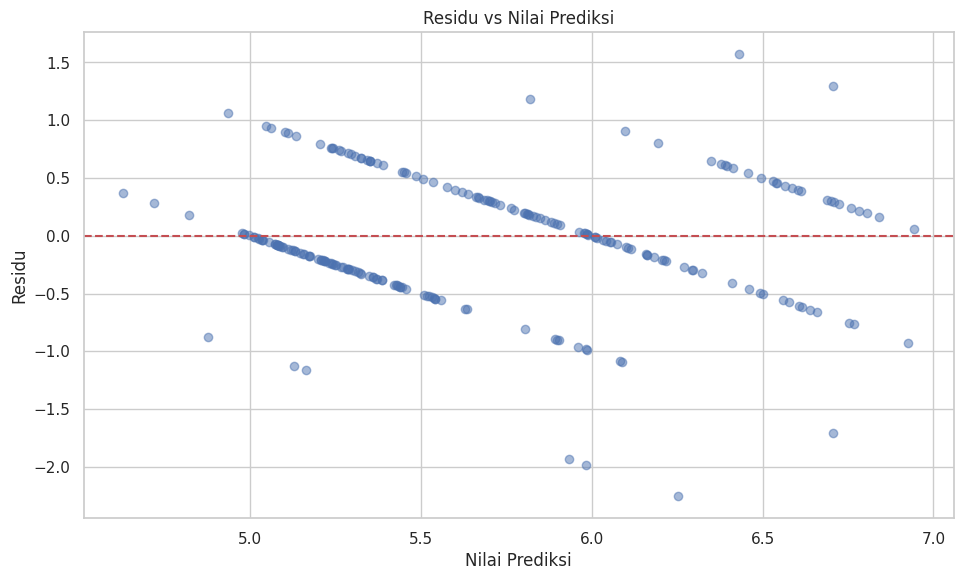

In [23]:
# Plot residu vs nilai prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Residu')
plt.title('Residu vs Nilai Prediksi')
plt.savefig('images/residuals_vs_predicted.png')
plt.show()

## 6. Conclusion

Proyek ini mengembangkan model pembelajaran mesin untuk memprediksi kualitas wine berdasarkan sifat fisikokimia, sebagai alternatif dari penilaian sensorik tradisional yang subjektif dan mahal. Kami melakukan eksplorasi data, persiapan data (termasuk penanganan outlier dan penskalaan fitur), pelatihan model, dan evaluasi performa.

Empat model diuji: Regresi Linier, Random Forest, Gradient Boosting, dan Random Forest yang disetel. Berdasarkan evaluasi pada set pengujian, Random Forest dengan pengaturan default menunjukkan performa terbaik dengan RMSE 0.5458, MAE 0.4107, dan R² 0.4647, mengungguli Regresi Linier (RMSE 0.5924, R² 0.3693), Gradient Boosting (RMSE 0.5809, R² 0.3935), dan Random Forest yang disetel (RMSE 0.5502, R² 0.4559). Meskipun penyetelan hiperparameter Random Forest memberikan sedikit peningkatan pada validasi silang (RMSE 0.6176), performanya pada set pengujian sedikit lebih rendah dibandingkan konfigurasi default, kemungkinan karena penyesuaian berlebih pada data validasi.

Model Random Forest (default) direkomendasikan untuk penerapan di kilang anggur karena akurasinya yang tinggi, kemampuan menjelaskan variabilitas kualitas wine, dan generalisasi yang baik pada data baru. Fitur-fitur penting dari model ini juga dapat memberikan wawasan tentang faktor fisikokimia yang paling memengaruhi kualitas wine, mendukung optimisasi proses produksi. Fungsi prediksi yang dikembangkan memungkinkan penerapan praktis untuk kontrol kualitas otomatis, mengurangi ketergantungan pada pengecapan ahli dan meningkatkan efisiensi operasional.